In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import *
from sklearn.preprocessing import *
from scipy import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_train = pd.read_csv('../sources/Data/house_data/train.csv')
df_train.columns[:10]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities'],
      dtype='object')

In [6]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# SalePrice 항목에 대한 탐색적 분석을 해 주세요.

# 정답 ↓
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
var = 'GrLivArea' # 지역이름

## ** concat
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1) # axis = 1: 열단위로 결합
data2 = pd.concat([df_train['SalePrice'], df_train[var]], axis=0) # axis = 0: 행단위로 결합


data.head(2)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262


In [11]:
data2.head(2)

0    208500
1    181500
dtype: int64

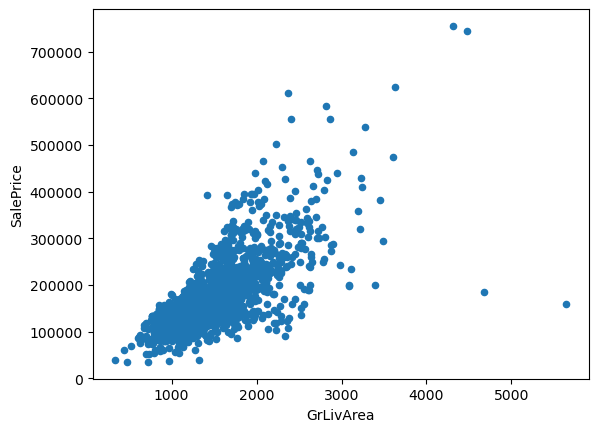

In [22]:
data.plot.scatter(x=var, y='SalePrice')
# 옵션: xlim=(0, 7000), ylim=(0, 900000))
plt.show()

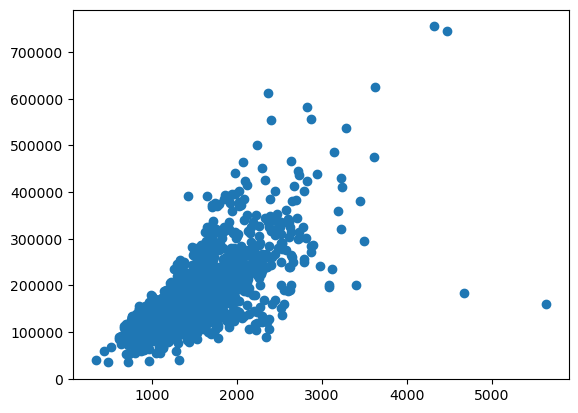

In [27]:
plt.scatter(df_train[var], df_train['SalePrice'])
plt.show()